In [72]:
import pandas as pd
import numpy as np
import geopandas  as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from pykrige.ok import OrdinaryKriging
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# import folium

In [73]:
df_2014_zone4 = pd.read_csv(r"E:\DS\Projects\Omdena_Milano\MilanItalChapter_UrbanAgriculture\Task _1\Modelling\Data\Final_combined_data_zone4_with_target_v2.csv").drop(columns=['Zone', 'LST'])
# df_2014 = pd.read_csv(r"https://drive.google.com/uc?export=download&id=12VtvWUseSi-8GDRpa8zl0AQ4v02p7lCw").drop(columns=['Zone', 'LST'])

df_2014_zone4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53186 entries, 0 to 53185
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         53186 non-null  float64
 1   Longitude        53186 non-null  float64
 2   NDVI             33771 non-null  float64
 3   landuse          23609 non-null  object 
 4   NDBI             39512 non-null  float64
 5   NDWI             33771 non-null  float64
 6   Roughness        53186 non-null  int64  
 7   SAVI             33771 non-null  float64
 8   Slope            53186 non-null  float64
 9   SMI              33771 non-null  float64
 10  solar_radiation  33771 non-null  float64
 11  Suitable_Areas   53186 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 4.9+ MB


In [74]:
df_2014_zone9 = pd.read_csv(r"E:\DS\Projects\Omdena_Milano\MilanItalChapter_UrbanAgriculture\Task _1\Modelling\Data\Final_combined_data_zone9_with_target_v2.csv").drop(columns=['Zone'])
# df_2014_zone9 = pd.read_csv(r"https://drive.google.com/uc?export=download&id=12VtvWUseSi-8GDRpa8zl0AQ4v02p7lCw").drop(columns=['Zone', 'LST'])

df_2014_zone9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64408 entries, 0 to 64407
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         64408 non-null  float64
 1   Longitude        64408 non-null  float64
 2   NDVI             35650 non-null  float64
 3   landuse          31697 non-null  object 
 4   NDBI             42030 non-null  float64
 5   NDWI             35650 non-null  float64
 6   Roughness        64408 non-null  int64  
 7   SAVI             35650 non-null  float64
 8   Slope            64408 non-null  float64
 9   SMI              35650 non-null  float64
 10  solar_radiation  35650 non-null  float64
 11  Suitable_Areas   64408 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 5.9+ MB


In [75]:
df_2014_zone4 = df_2014_zone4.dropna(how='any')
df_2014_zone9 = df_2014_zone9.dropna(how='any')

In [76]:
df_2014_zone4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14239 entries, 279 to 49757
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         14239 non-null  float64
 1   Longitude        14239 non-null  float64
 2   NDVI             14239 non-null  float64
 3   landuse          14239 non-null  object 
 4   NDBI             14239 non-null  float64
 5   NDWI             14239 non-null  float64
 6   Roughness        14239 non-null  int64  
 7   SAVI             14239 non-null  float64
 8   Slope            14239 non-null  float64
 9   SMI              14239 non-null  float64
 10  solar_radiation  14239 non-null  float64
 11  Suitable_Areas   14239 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 1.4+ MB


In [77]:
df_2014_zone9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20979 entries, 370 to 64301
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         20979 non-null  float64
 1   Longitude        20979 non-null  float64
 2   NDVI             20979 non-null  float64
 3   landuse          20979 non-null  object 
 4   NDBI             20979 non-null  float64
 5   NDWI             20979 non-null  float64
 6   Roughness        20979 non-null  int64  
 7   SAVI             20979 non-null  float64
 8   Slope            20979 non-null  float64
 9   SMI              20979 non-null  float64
 10  solar_radiation  20979 non-null  float64
 11  Suitable_Areas   20979 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 2.1+ MB


In [78]:
# Combining the zone4 and zone9 data
df_2014 = pd.concat([df_2014_zone4, df_2014_zone9], axis=0)
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35218 entries, 279 to 64301
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         35218 non-null  float64
 1   Longitude        35218 non-null  float64
 2   NDVI             35218 non-null  float64
 3   landuse          35218 non-null  object 
 4   NDBI             35218 non-null  float64
 5   NDWI             35218 non-null  float64
 6   Roughness        35218 non-null  int64  
 7   SAVI             35218 non-null  float64
 8   Slope            35218 non-null  float64
 9   SMI              35218 non-null  float64
 10  solar_radiation  35218 non-null  float64
 11  Suitable_Areas   35218 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 3.5+ MB


In [79]:
df_2014.describe()

,Latitude,Longitude,NDVI,NDBI,NDWI,Roughness,SAVI,Slope,SMI,solar_radiation,Suitable_Areas
count,35218.000000,35218.000000,35218.000000,35218.000000,35218.000000,35218.000000,35218.000000,35218.000000,35218.000000,35218.000000,35218.000000
mean,45.488442,9.204916,0.367543,-0.080904,-0.378761,3.236356,0.551238,86.329710,0.290599,467.931251,0.344000
std,0.031113,0.033673,0.192689,0.124937,0.151993,11.451009,0.289009,17.766893,0.342320,12.612015,0.475048
min,45.423312,9.143143,-0.023555,-0.433571,-0.737644,0.000000,-0.035294,0.000000,-11.169263,445.769650,0.000000
25%,45.459155,9.176830,0.202772,-0.173892,-0.496368,0.000000,0.304102,89.978163,0.250595,454.554800,0.000000
50%,45.497423,9.202701,0.334371,-0.066726,-0.360333,1.000000,0.501479,89.986189,0.332918,466.554050,0.000000
75%,45.516557,9.228303,0.517692,0.017940,-0.258615,1.000000,0.776411,89.992510,0.378973,477.732940,1.000000
max,45.536231,9.272770,0.838593,0.281549,0.185649,73.000000,1.257768,89.999905,7.569495,489.673280,1.000000


In [80]:
df_2014.to_csv(r'E:\DS\Projects\Omdena_Milano\MilanItalChapter_UrbanAgriculture\Task _1\Modelling\combined_data_2014.csv', index=False)

In [81]:
categorical_features = []
numerical_features = []

for column in df_2014.drop(columns=['Longitude', 'Latitude', 'Suitable_Areas']).columns:
    if df_2014[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print(f"Categorical Features are : {categorical_features}")
print(f"Numerical Features are : {numerical_features}")

Categorical Features are : ['landuse']
Numerical Features are : ['NDVI', 'NDBI', 'NDWI', 'Roughness', 'SAVI', 'Slope', 'SMI', 'solar_radiation']


#### Missing Data Imputation 

In [82]:
# # Convert the DataFrame to a GeoDataFrame
# gdf = gpd.GeoDataFrame(
#     df_2014, geometry=gpd.points_from_xy(df_2014.Longitude, df_2014.Latitude)
# )

# # Impute categorical values using the most frequent value imputation
# categorical_features = ['landuse']

# for feature in categorical_features:
#     mode_value = gdf[feature].mode()[0]
#     gdf[feature].fillna(mode_value, inplace=True)

# # Alternatively, using KNN for categorical data imputation
# def knn_categorical_imputer(gdf, feature, k=5):
#     known_data = gdf[gdf[feature].notnull()]
#     unknown_data = gdf[gdf[feature].isnull()]
    
#     if unknown_data.empty:
#         return gdf

#     knn = KNeighborsClassifier(n_neighbors=k)
    
#     known_data_encoded = known_data.copy()
#     unknown_data_encoded = unknown_data.copy()
    
#     # Encoding categorical features
#     le = LabelEncoder()
#     known_data_encoded[feature] = le.fit_transform(known_data_encoded[feature])
    
#     knn.fit(known_data_encoded[['Latitude', 'Longitude']], known_data_encoded[feature])
    
#     predictions = knn.predict(unknown_data_encoded[['Latitude', 'Longitude']])
#     gdf.loc[gdf[feature].isnull(), feature] = le.inverse_transform(predictions)
    
#     return gdf

# # Apply KNN imputation for the categorical feature
# gdf = knn_categorical_imputer(gdf, 'landuse')

# # Display the imputed DataFrame
# gdf.head()

In [83]:
# df_2014 = pd.DataFrame(gdf.drop(columns=['geometry']))
# df_2014.info()

In [84]:
df_2014 = df_2014.dropna(how='any')

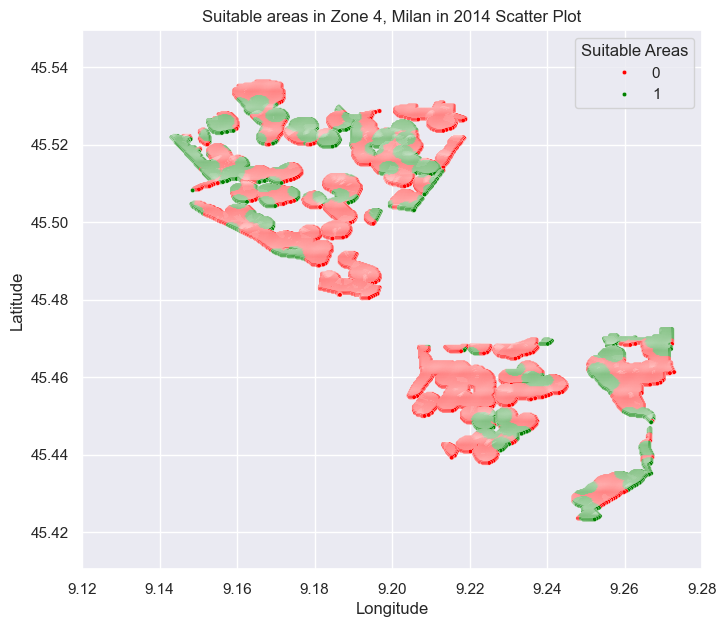

In [85]:
plt.figure(figsize=(8, 7))
ax = sns.scatterplot(x='Longitude', y='Latitude', hue='Suitable_Areas', palette={0: 'red', 1: 'green'}, data=df_2014, s=10)

# Set aspect ratio to be equal
ax.set_aspect('equal', adjustable='datalim')

# Add more ticks on x and y axis
plt.xticks(ticks=plt.gca().get_xticks())
plt.yticks(ticks=plt.gca().get_yticks())

plt.title('Suitable areas in Zone 4, Milan in 2014 Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Suitable Areas')
plt.show()


In [86]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score


In [87]:
df_2014[numerical_features].describe()

,NDVI,NDBI,NDWI,Roughness,SAVI,Slope,SMI,solar_radiation
count,35218.000000,35218.000000,35218.000000,35218.000000,35218.000000,35218.000000,35218.000000,35218.000000
mean,0.367543,-0.080904,-0.378761,3.236356,0.551238,86.329710,0.290599,467.931251
std,0.192689,0.124937,0.151993,11.451009,0.289009,17.766893,0.342320,12.612015
min,-0.023555,-0.433571,-0.737644,0.000000,-0.035294,0.000000,-11.169263,445.769650
25%,0.202772,-0.173892,-0.496368,0.000000,0.304102,89.978163,0.250595,454.554800
50%,0.334371,-0.066726,-0.360333,1.000000,0.501479,89.986189,0.332918,466.554050
75%,0.517692,0.017940,-0.258615,1.000000,0.776411,89.992510,0.378973,477.732940
max,0.838593,0.281549,0.185649,73.000000,1.257768,89.999905,7.569495,489.673280


In [88]:
df_2014[categorical_features].describe()

,landuse
count,35218
unique,18
top,grass
freq,14566


Is Data Balanced?
(Which I already know is not!!)

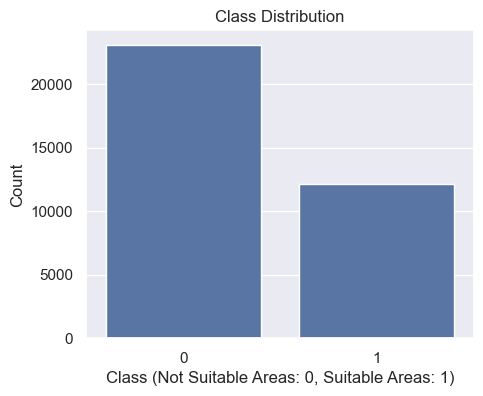

In [89]:
# Checking if data is balanced or not
class_distribution = df_2014['Suitable_Areas'].value_counts()

# Plotting the class distribution as a bar chart
plt.figure(figsize=(5, 4))
sns.countplot(x='Suitable_Areas', data=df_2014)
plt.title('Class Distribution')
plt.xlabel('Class (Not Suitable Areas: 0, Suitable Areas: 1)')
plt.ylabel('Count')
plt.show()

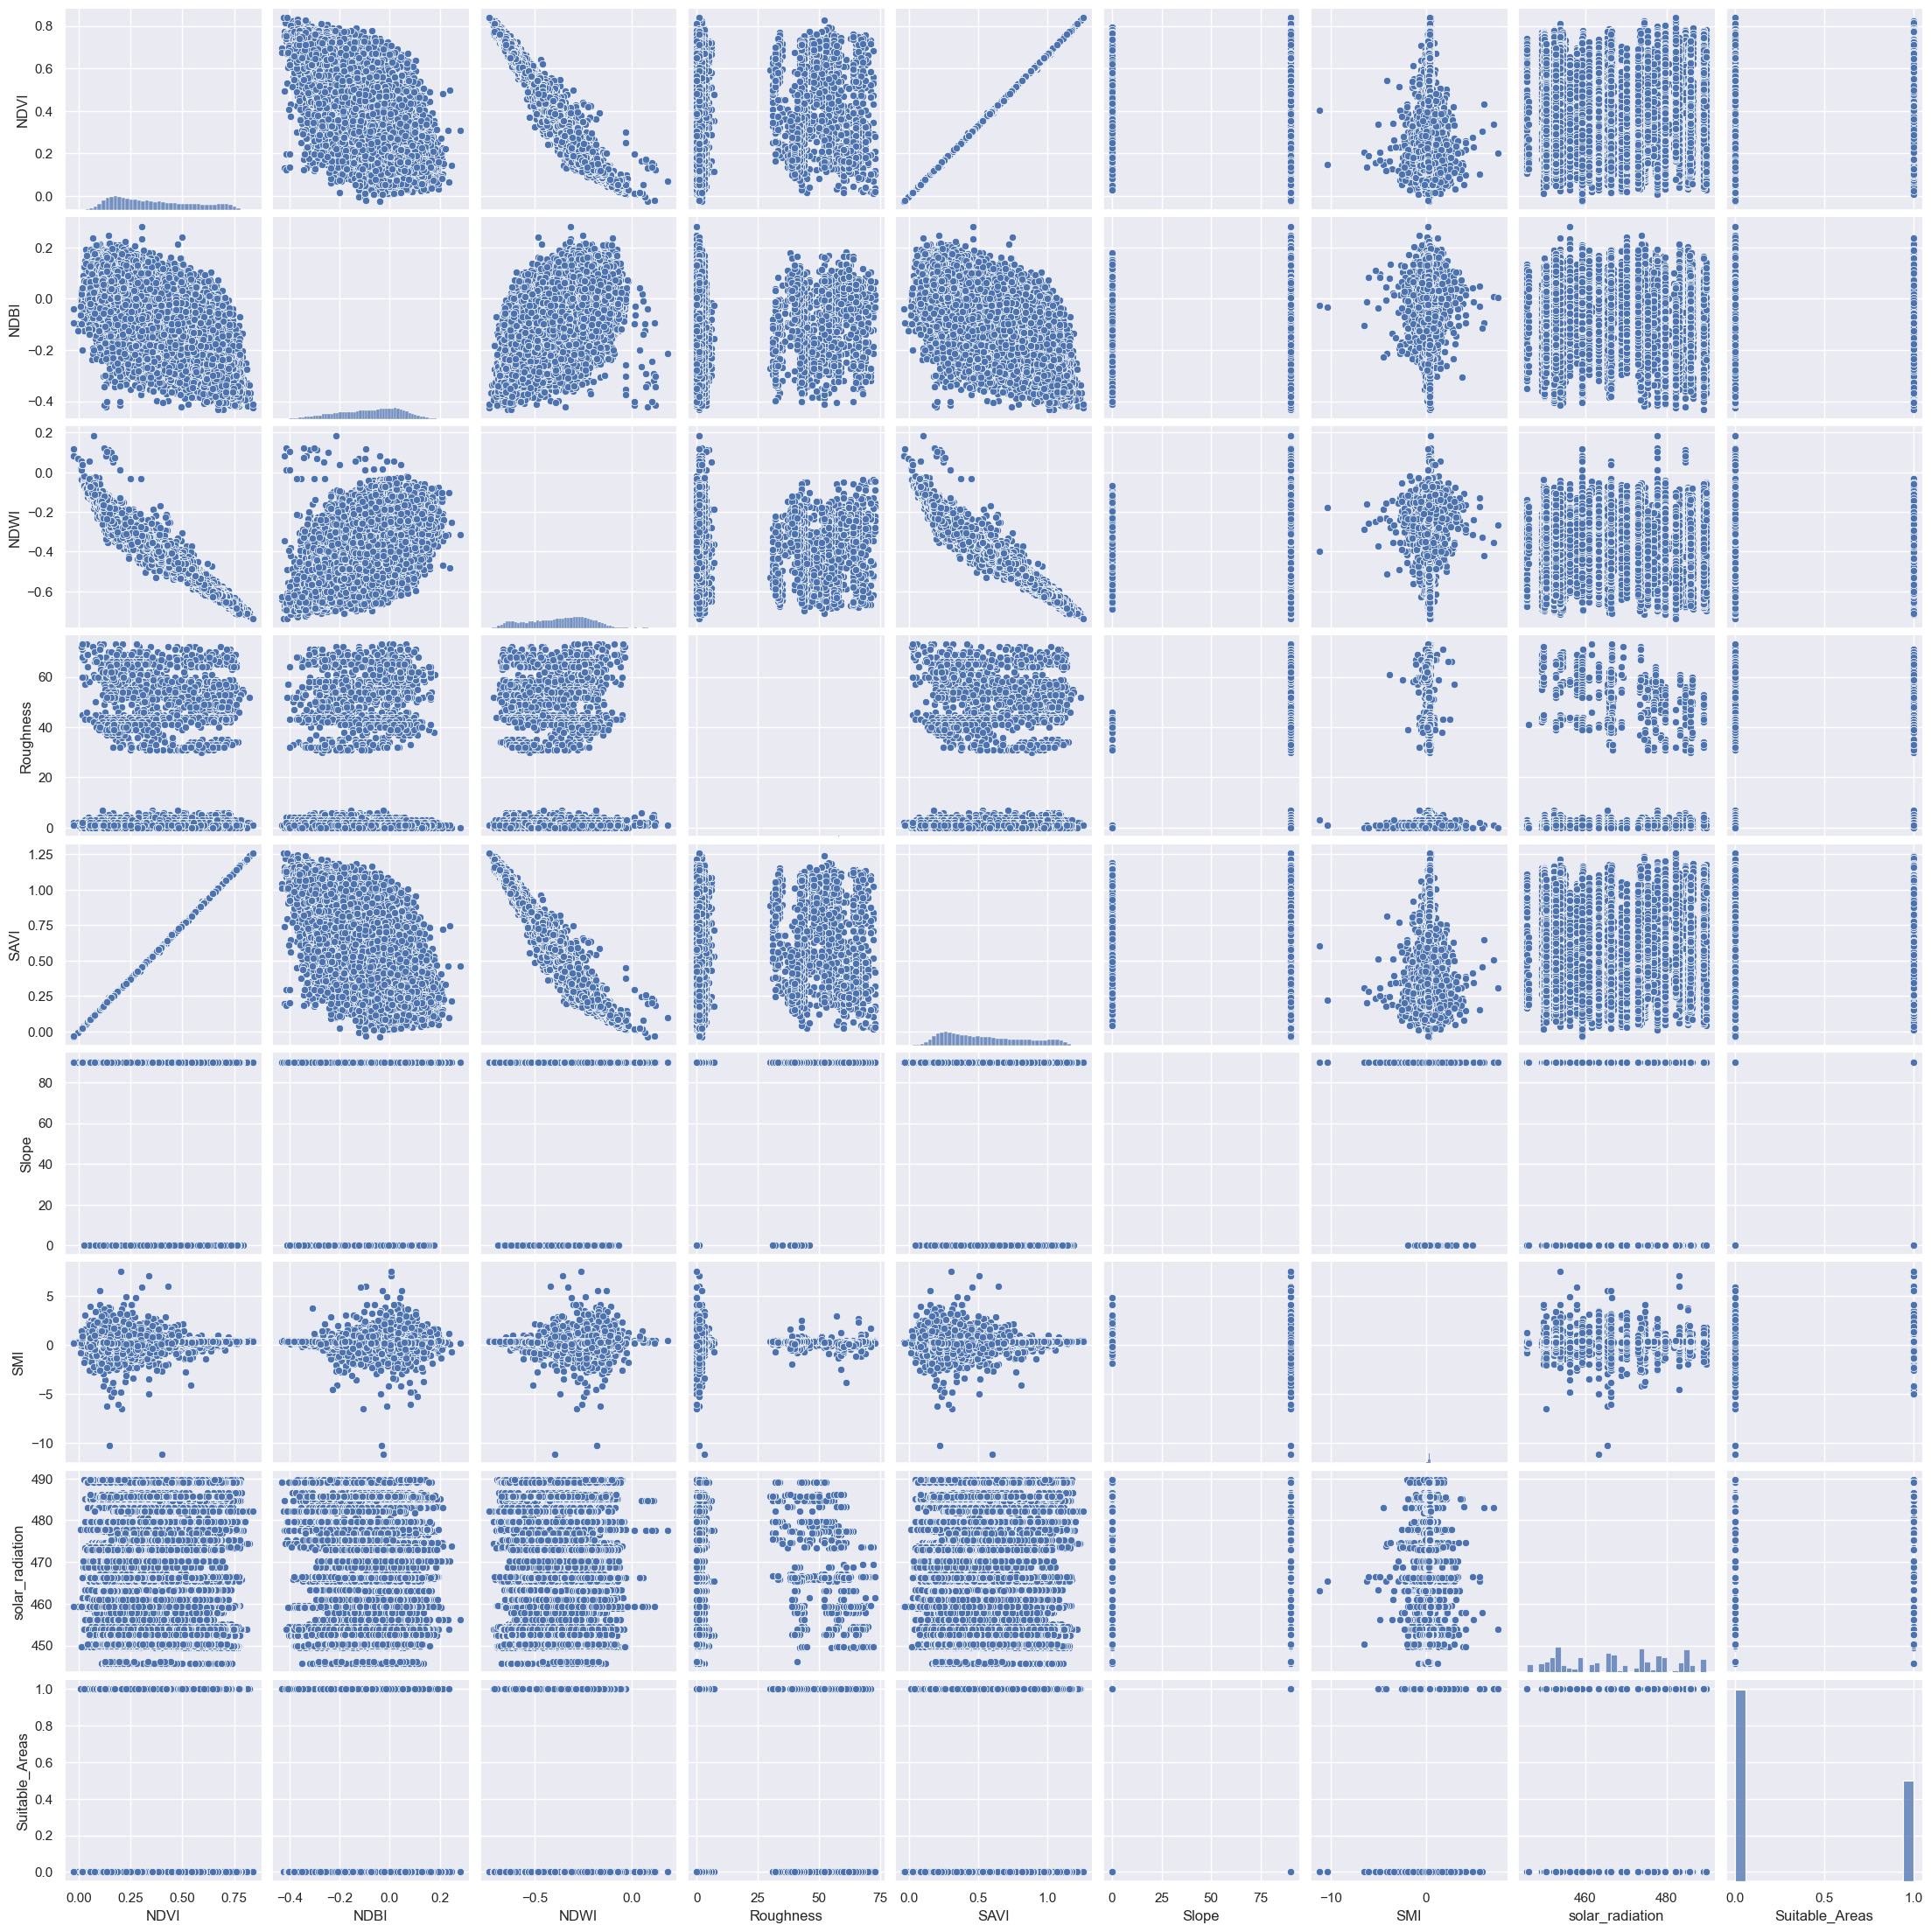

In [90]:
# Plotting Numerical Features
sns.pairplot(df_2014.drop(columns=['Longitude', 'Latitude']))

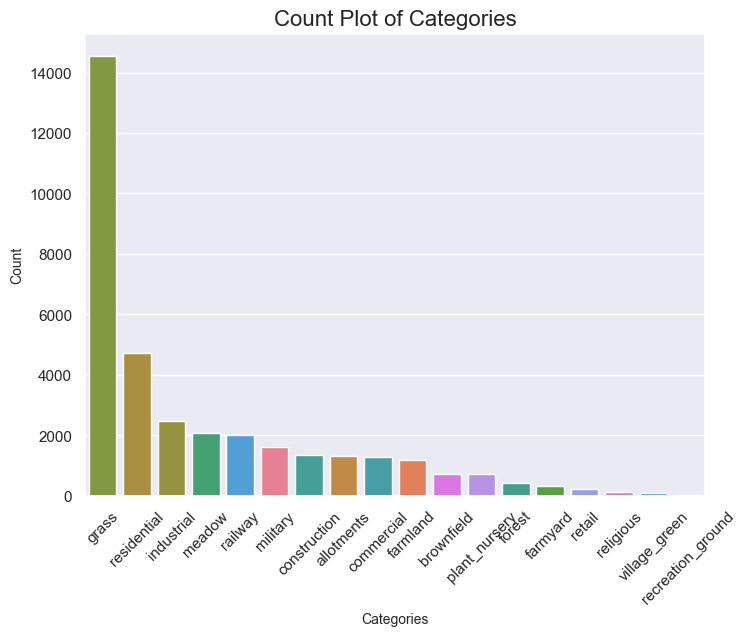

In [91]:
# Plotting Categorical Features

# Create a seaborn count plot
sns.set_theme(style="darkgrid")  
plt.figure(figsize=(8, 6))

# Plot the count plot
sns.countplot(x=df_2014['landuse'], hue=df_2014['landuse'], legend=False, order=df_2014['landuse'].value_counts().index)

# Add labels and title
plt.xlabel('Categories', fontsize=10)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=10)
plt.title('Count Plot of Categories', fontsize=16)

# Show the plot
plt.show()

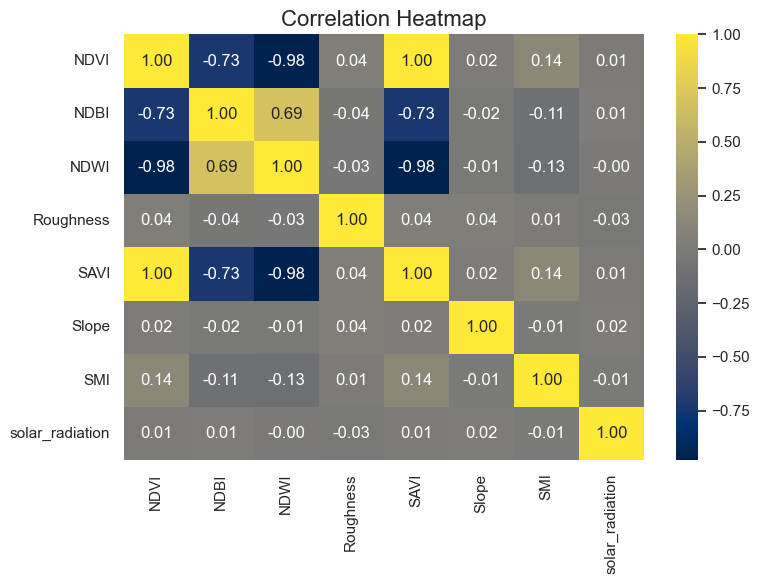

In [92]:
corr = df_2014[numerical_features].corr() 

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='cividis', fmt=".2f")

# Add title and adjust layout
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()

# Show plot
plt.show()

In [93]:
X = df_2014.drop(['Suitable_Areas'], axis=1)
y = df_2014['Suitable_Areas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating Pipeline

In [94]:
# Preprocessing for numerical data
numerical_transformer = MinMaxScaler()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
    ('scaler', MinMaxScaler())
])

In [95]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Trying Ensemble Models

In [123]:
# Define Model
rf_model = RandomForestClassifier(n_estimators=80, max_depth=8, min_samples_split=50, random_state=42)

In [124]:
def performance_metrics(model, y_test, preds):
    print(f'Accuracy Score: {accuracy_score(y_test, preds)}')
    print(f'precision Score: {precision_score(y_test, preds)}')
    print(f'Recall Score: {recall_score(y_test, preds)}')

    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    # Plot ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    # plt.show()

    plt.subplot(1, 2, 2)
    # Compute confusion matrix
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    # Plot confusion matrix using seaborn heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [125]:
def plot_cv_score(model):
    # Apply cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Plot the cross-validation scores
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='--', color='b')
    plt.ylim([0, 1])
    plt.title('Cross-Validation Accuracy Scores')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.show()

    # Print the mean and standard deviation of the cross-validation scores
    print(f'Cross-Validation Accuracy: Mean = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}')

Traning Performance:
Accuracy Score: 0.7418896855256619
precision Score: 0.8280748663101605
Recall Score: 0.3184248406333539


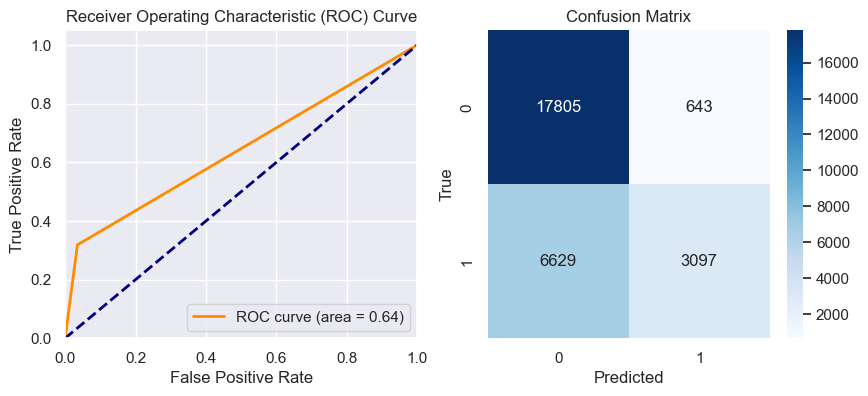

Test Performance:
Accuracy Score: 0.7438955139125497
precision Score: 0.8141783029001074
Recall Score: 0.3172875680200921


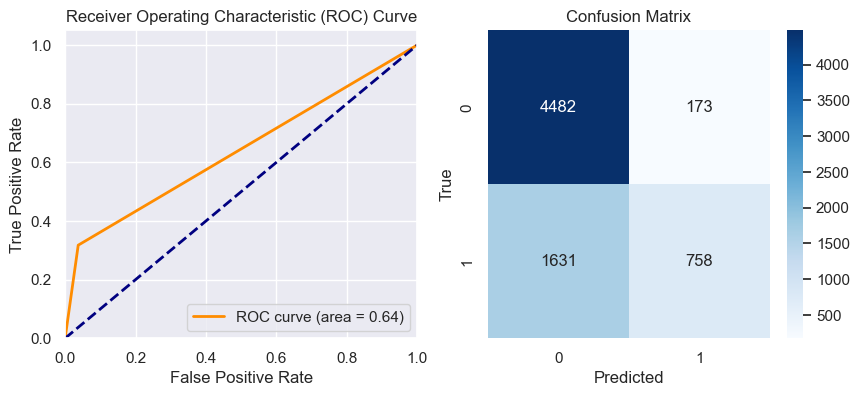

In [126]:
rf_classifier = Pipeline(steps=[('Preprocessor', preprocessor),
                         ('model', rf_model)])

# Preprocessing of training data, fit model
rf_classifier.fit(X_train, y_train)

# Preprocessing of test data, get predictions
preds = rf_classifier.predict(X_test)
test_preds = rf_classifier.predict(X_train)

print("Traning Performance:")
performance_metrics(rf_classifier, y_train, test_preds)

print("Test Performance:")
performance_metrics(rf_classifier, y_test, preds)

In [127]:
def plot_feature_importance(model_pipeline, model_name):
    # Access the trained Classifier
    model = model_pipeline.named_steps['model']

    # Get the feature names after one-hot encoding
    # This part correctly retrieves the feature names after transformation
    encoded_features = model_pipeline.named_steps['Preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(encoded_features)

    # Get feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort in descending order

    # Create a DataFrame for plotting
    feature_importances = pd.DataFrame({
        'Feature': [all_feature_names[i] for i in indices],
        'Importance': importances[indices]
    })

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title(f'{model_name} Feature Importances')
    plt.show()

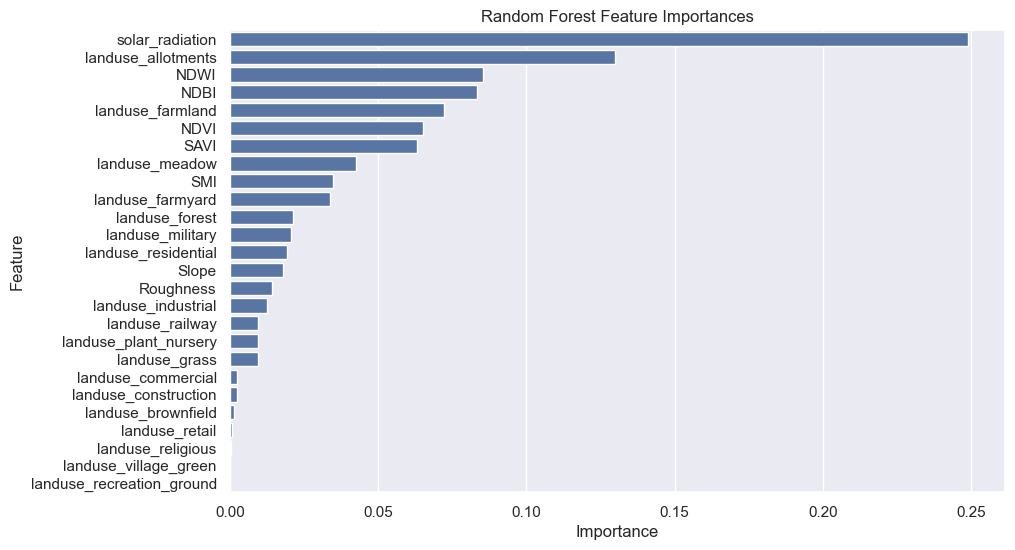

In [128]:
plot_feature_importance(rf_classifier, 'Random Forest')

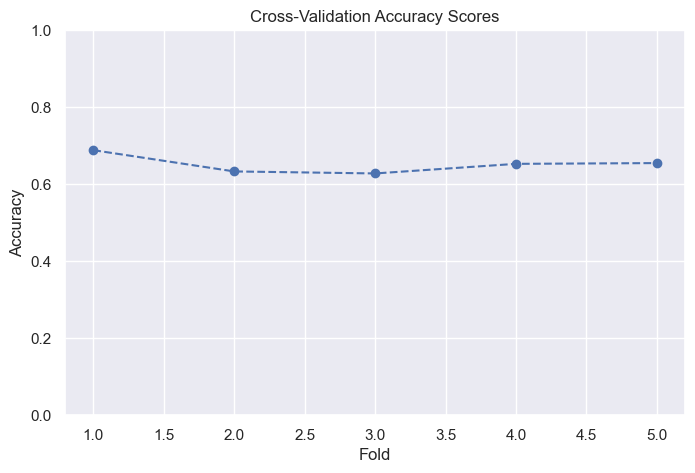

Cross-Validation Accuracy: Mean = 0.6516, Std = 0.0213


In [122]:
plot_cv_score(rf_classifier)

Traning Performance:
Accuracy Score: 0.8758784695108965
precision Score: 0.8486510690697414
Recall Score: 0.7794571252313387


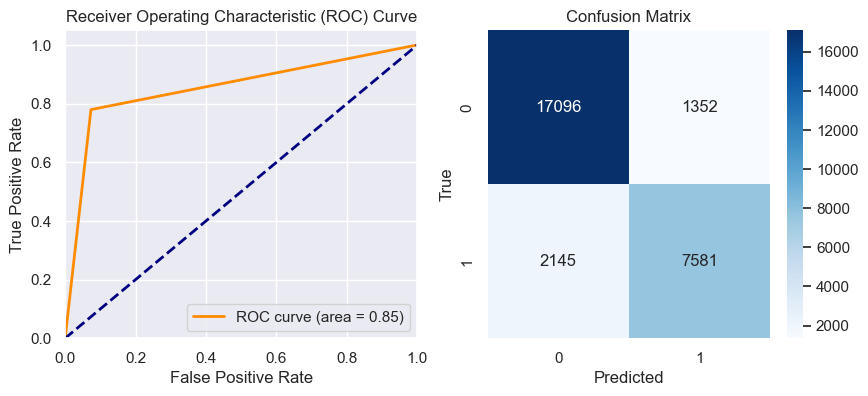

Test Performance:
Accuracy Score: 0.8471039182282794
precision Score: 0.7987249544626593
Recall Score: 0.7341984093763081


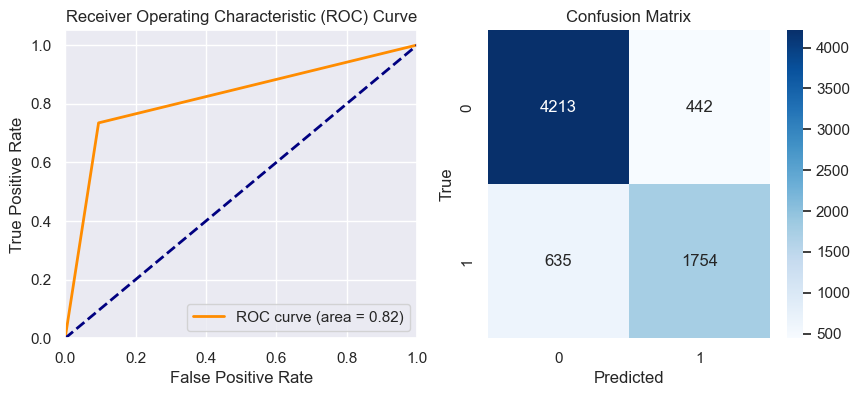

In [129]:
# Define model & Find optimal value for n_estimators
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.02, eval_metric=accuracy_score, random_state=0)

xgb_classifier = Pipeline(steps=[('Preprocessor', preprocessor),
                                ('model', xgb_model)])

xgb_classifier.fit(X_train, y_train)
preds = xgb_classifier.predict(X_test)
test_preds = xgb_classifier.predict(X_train)

print("Traning Performance:")
performance_metrics(xgb_classifier, y_train, test_preds)

print("Test Performance:")
performance_metrics(xgb_classifier, y_test, preds)

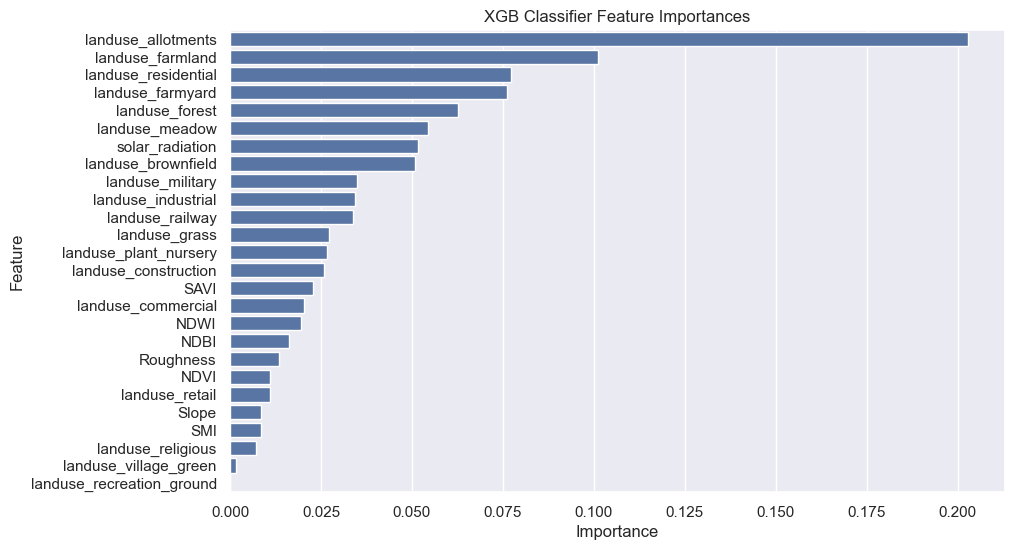

In [130]:
plot_feature_importance(xgb_classifier, 'XGB Classifier')

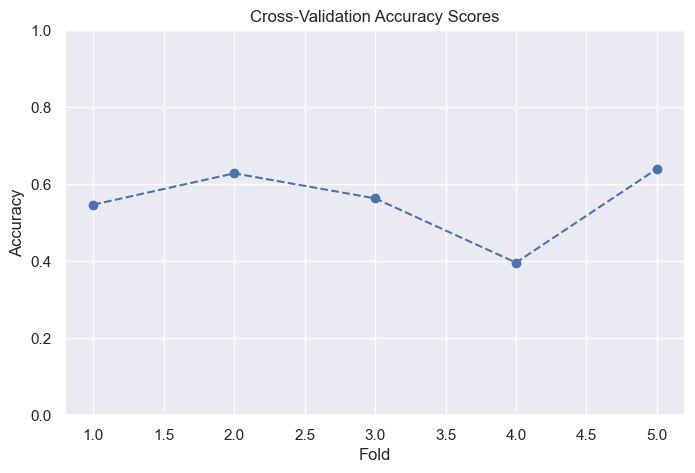

Cross-Validation Accuracy: Mean = 0.5550, Std = 0.0871


In [131]:
plot_cv_score(xgb_classifier)

In [132]:
df_2023_zone4 = pd.read_csv(r"E:\DS\Projects\Omdena_Milano\Data_Collection\Data_cleaning\Extracted Data\Zone4_merged.csv")
# Data_set Link --> https://drive.google.com/file/d/1gHogsQeZyfqe70GDwKICsF6P3OmmbouA/view?usp=drive_link

df_2023_zone4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633543 entries, 0 to 633542
Data columns (total 27 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   latitude                                   633543 non-null  float64
 1   longitude                                  633543 non-null  float64
 2   GHI (kWh/m2)                               633543 non-null  float64
 3   NDBI                                       633543 non-null  float64
 4   NDVI                                       633543 non-null  float64
 5   BU                                         633543 non-null  float64
 6   slope                                      633543 non-null  float64
 7   surface_roughness                          633543 non-null  float64
 8   classes                                    633543 non-null  int64  
 9   CH4_column_volume_mixing_ratio_dry_air_x   633543 non-null  float64
 10  CO_colum

In [133]:
df_2023_zone4 = df_2023_zone4.dropna(axis=1)

In [134]:
# Renaming the columns in the 2023 data to find the suitable areas in zones
df_2023_zone4.rename({'soil_moisture': 'SMI', 'surface_roughness':'Roughness', 'LandUse': 'landuse', 'latitude': 'Latitude', 'longitude': 'Longitude', 'slope': 'Slope', 'GHI (kWh/m2)': 'solar_radiation'}, axis=1, inplace=True)


In [135]:
# Keeping columns which are present in the trained model
features_2023 = df_2023_zone4.columns
features_2014 = df_2014.columns
features_to_keep = [feature for feature in features_2023 if feature in features_2014]
print(f'Features to keep in 2023 Data:\n {features_to_keep}')

df_2023_zone4 = df_2023_zone4[features_to_keep]

Features to keep in 2023 Data:
 ['Latitude', 'Longitude', 'solar_radiation', 'NDBI', 'NDVI', 'Slope', 'Roughness', 'NDWI', 'SMI', 'landuse', 'SAVI']


In [136]:
df_2023_zone4['Suitable_Areas'] = xgb_classifier.predict(df_2023_zone4[features_to_keep])

C:\Users\Nitesh Kesharwani\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


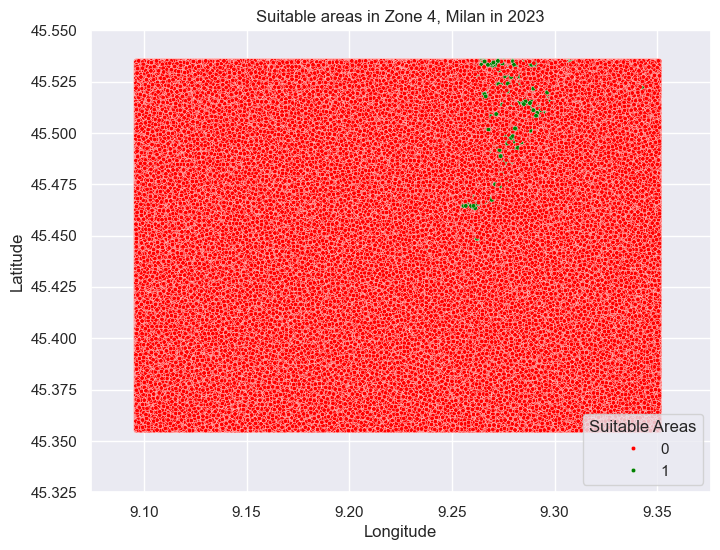

In [137]:

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x='Longitude', y='Latitude', hue='Suitable_Areas', palette={0: 'red', 1: 'green'}, data=df_2023_zone4, s=10)

# Set aspect ratio to be equal
ax.set_aspect('equal', adjustable='datalim')

# Add more ticks on x and y axis
plt.xticks(ticks=plt.gca().get_xticks())
plt.yticks(ticks=plt.gca().get_yticks())

plt.title('Suitable areas in Zone 4, Milan in 2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Suitable Areas')
plt.show()


In [138]:
df_2023_zone4[['Longitude', 'Latitude']][df_2023_zone4['Suitable_Areas'] == 1].iloc[np.r_[0:10, -10:0]]

,Longitude,Latitude
68,9.271018,45.492707
219,9.282337,45.493246
413,9.292308,45.512380
459,9.291769,45.508607
901,9.287996,45.533131
1032,9.265628,45.465219
1519,9.268593,45.533401
1668,9.292847,45.507529
1817,9.272096,45.520196
2107,9.270209,45.466836


###  Testing Linear Model

Traning Performance:
Accuracy Score: 0.7051181940796479
precision Score: 0.6618721461187215
Recall Score: 0.2980670368085544


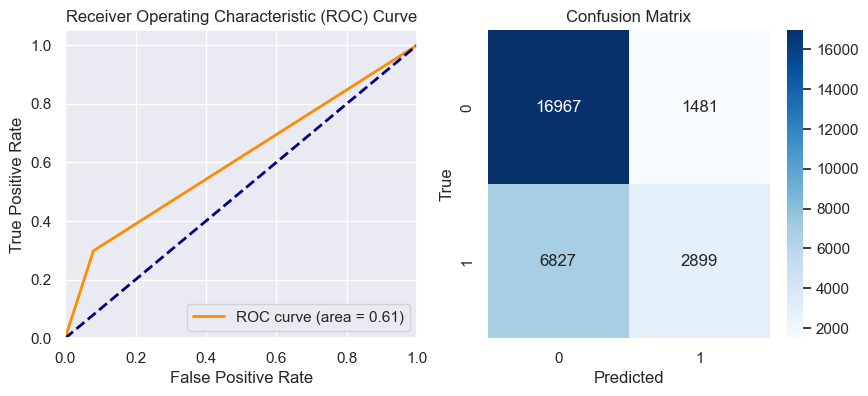

Test Performance:
Accuracy Score: 0.7122373651334469
precision Score: 0.6675925925925926
Recall Score: 0.3017999162829636


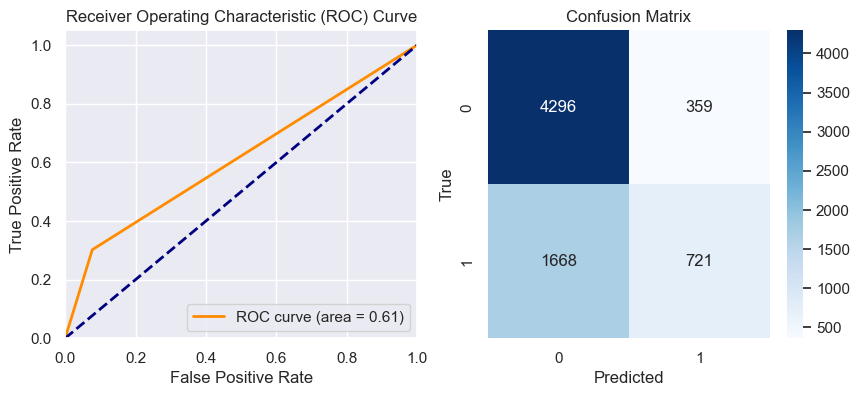

In [139]:
from sklearn.linear_model import LogisticRegression

# Define model & Find optimal value for n_estimators
lr_model = LogisticRegression()

lr_classifier = Pipeline(steps=[('Preprocessor', preprocessor),
                                ('model', lr_model)])

lr_classifier.fit(X_train, y_train)
preds = lr_classifier.predict(X_test)
test_preds = lr_classifier.predict(X_train)


print("Traning Performance:")
performance_metrics(lr_classifier, y_train, test_preds)

print("Test Performance:")
performance_metrics(lr_classifier, y_test, preds)